
Do I need this?

**But what is your risk-aversion?**

That is a hard question to answer!

A more productive way to think about this choice is in terms of the level of volatility that you are comfortable with. 

You can basically choose a gamma that implements your desired volatility

using the weights $X^*=\frac{1}{\gamma}E[R^e]'Var(R^e)^{-1}$ we get

$$Var((X^*)'R^e)=Var(\frac{1}{\gamma}E[R^e]'Var(R^e)^{-1}R^e)$$

We first pull the $1/\gamma$ out. Recall that $Var(nx)=n^2Var(x)$

$$Var((X^*)'R^e)=\frac{1}{\gamma^2}Var(E[R^e]'Var(R^e)^{-1}R^e)$$

We now simply pull the vector $E[R^e]'Var(R^e)^{-1}$ out which because it is a vector the math is a bit different.

In this case if the random variable X is a vector being multiplied by another vector W, then $Var(WX)=WVar(X)W^T$. Apply this here we get

$$Var((W^*)'R^e)=\frac{1}{\gamma^2}E[R^e]'Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]$$

Using that $Var(R^e)^{-1}Var(R^e)=I$, i.e. the identity matrix, we get

$Var((W^*)'R^e)=\frac{1}{\gamma^2}E[R^e]'Var(R^e)^{-1}E[R^e]$

We can now solve for the desired level, say you want you portfolio to be mean-variance efficient and have volatility  equal to a target $\sigma^{D}$, D for desired.

$\sigma^D=\sqrt{Var((W^*)'R^e)}=\frac{1}{\gamma}\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$

where above we took the square root to go from variance to volatility. 

We can now solve for $\gamma$ consisten with the desired vol

$$\gamma=\frac{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}{\sigma^D}$$

Thus the optimal weights are 

$$W^*(\sigma^D)'=\frac{\sigma^D}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}E[R^e]'Var(R^e)^{-1}$$

Looks complicated!

But it is not

Note: $\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$ is the volatility of the optimal portfolio with risk-aversion 1 ,i.e. the portfolio $W^*=E[R^e]'Var(R^e)^{-1}$. 

You simply leverage up\leverage down the weights up and down to hit your desired volatility level

The important point is that $\frac{\sigma^D}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}$ is a scalar, so you are increasing/decreasing exposure in the risky asset proportionally.

Your position in the risk-free asset can be simply solved for 


$$1-1'X^*=1- \frac{\sigma^D}{\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}}1'Var(R^e)^{-1}E[R^e]$$


Where $1'X^*=x^*_1+x^*_2+...+x^*_I$ because 1 here is a vector of 1's

When you do the dot product of a vector on 1's with any vector it has the effect of summing the different entries of that vector

So the more volatility you want, the less you invest in the risk-free asset and the more you invest in the risky assets.


In [98]:
InSampleResults=pd.DataFrame([],index=[])
Strategy=pd.DataFrame([],index=[])
sigmaD=0.15/(12**0.5)
Emv=np.ones(Re.shape[1])
for date in Re['1973-1':].index:
    ERe=Re[:date- pd.DateOffset(months=1)].mean()
    CovRe=Re[:date- pd.DateOffset(months=1)].cov()
     # the only difference is that now I use the vector ones instead of 
        #sample means for expected returns
    W=np.linalg.inv(CovRe) @ Emv * (sigmaD/(Emv @ np.linalg.inv(CovRe) @ Emv)**0.5)

    InSampleResults.at[date,'avgreturn']=W @ ERe*12
    InSampleResults.at[date,'volatility']=(W @ CovRe @ W*12)**0.5
    InSampleResults.at[date,'sharperatio']=W @ ERe*12/(W @ CovRe @ W*12)**0.5
    Strategy.at[date,'Returns']=W @ Re.loc[date]


Text(0.5, 1.0, 'Sharpe Ratio')

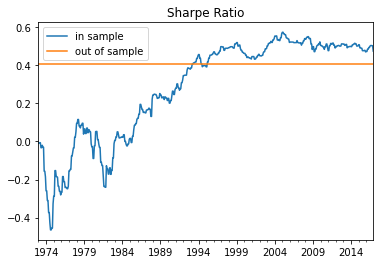

In [86]:
ax=plt.Figure()
InSampleResults.sharperatio.plot()
# Iam using this as trick to plot an horizontal line. So I am getting the dataframing with all the dates and simply subsituting the value of Sharpe ratio below
OutofSample=InSampleResults.sharperatio.copy()
OutofSample[:]=(Strategy.Returns.mean()*12)/(Strategy.Returns.std()*12**0.5)
OutofSample.plot()
plt.legend(['in sample','out of sample'])
plt.title('Sharpe Ratio')


In [92]:
1/np.diag(Re.cov())

array([ 513.35357526,  815.14734135,  281.19004241,  458.3662201 ,
       2459.19902061])

In [90]:
np.diag(np.diag(Re.cov()))

array([[0.00194798, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00122677, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00355631, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00218166, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00040664]])

In [97]:
InSampleResults=pd.DataFrame([],index=[])
Strategy=pd.DataFrame([],index=[])
sigmaD=0.15/(12**0.5)

Ones=np.ones(Re.shape[1])

for date in Re['1973-1':].index:
    ERe=Re[:date- pd.DateOffset(months=1)].mean()
    CovRe=Re[:date- pd.DateOffset(months=1)].cov()
    
    # this below is the key difference where I coistruct the covriance 
    # and the expected returns under the risk parity assumption to construc the weights 
    CovRP=np.diag(np.diag(Re[:date- pd.DateOffset(months=1)].cov()))
    ERP=np.diag(Re[:date- pd.DateOffset(months=1)].cov())**0.5

    W=np.linalg.inv(CovRP) @ ERP * (sigmaD/(ERP @ np.linalg.inv(CovRP) @ ERP)**0.5)

    InSampleResults.at[date,'avgreturn']=W @ ERe*12
    InSampleResults.at[date,'volatility']=(W @ CovRe @ W*12)**0.5
    InSampleResults.at[date,'sharperatio']=W @ ERe*12/(W @ CovRe @ W*12)**0.5
    Strategy.at[date,'Returns']=W @ Re.loc[date]


Text(0.5, 1.0, 'Sharpe Ratio')

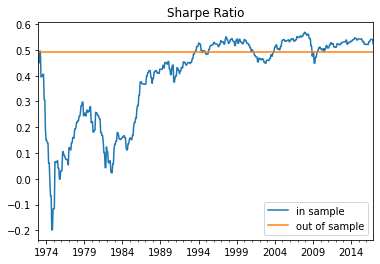

In [95]:
ax=plt.Figure()
InSampleResults.sharperatio.plot()
# Iam using this as trick to plot an horizontal line. So I am getting the dataframing with all the dates and simply subsituting the value of Sharpe ratio below
OutofSample=InSampleResults.sharperatio.copy()
OutofSample[:]=(Strategy.Returns.mean()*12)/(Strategy.Returns.std()*12**0.5)
OutofSample.plot()
plt.legend(['in sample','out of sample'])
plt.title('Sharpe Ratio')
